In [0]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from keras.layers import (Input, Dense, Concatenate)
from keras.utils import np_utils
import tensorflow as tf
from keras import models

In [0]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [0]:
# Model1 = load_model("model1_path")
# Model3=*your new model with random initialized weights
# print("COPYING WEIGHTS OF TRAINED MOdel1 INTO MODEL3")
# for i in range(len(Model_1)):
#     weight_Model_1=np.copy(Model1.layers[Model1[i]].get_weights())
#     Model3.layers[Model3[i]].set_weights(weight_Model_1)


In [0]:
x_train = x_train.reshape(x_train.shape[0], np.prod(x_train.shape[1:]))
x_test = x_test.reshape(x_test.shape[0], np.prod(x_test.shape[1:]))
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [14]:
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [0]:
# Denoising Autoencoder Architecture

def DNN(features_shape, num_classes, act='relu'):

    # Input
    x = Input(name='inputs', shape=features_shape, dtype='float32')
    o = x
    
    # Encoder / Decoder
    o = Dense(64, activation=act, name='dense1')(o)
    o = Dense(64, activation=act, name='dense2')(o)
    o = Dense(64, activation=act, name='dense3')(o)
    y_pred = Dense(num_classes, activation='sigmoid', name='pred')(o)
    
    # Print network summary
    Model(inputs=x, outputs=y_pred).summary()
    
    return Model(inputs=x, outputs=y_pred)

In [0]:

input_shape2 = (x_train.shape[1],)
num_classes = 10
# Categorical representation
y_train_ohe = np_utils.to_categorical(y_train, num_classes)
y_test_ohe = np_utils.to_categorical(y_test, num_classes)
 
batch_size = 128
epochs = 20
model_fname = 'dnn3'



In [31]:

deep = DNN(input_shape2, num_classes)

# The File need to be transferred from task1
# Loading the weisghts learned from Task1
deep.load_weights("/content/sample_data/dnn.hdf5")
deep.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['acc'])
            

Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 784)               0         
_________________________________________________________________
dense1 (Dense)               (None, 64)                50240     
_________________________________________________________________
dense2 (Dense)               (None, 64)                4160      
_________________________________________________________________
dense3 (Dense)               (None, 64)                4160      
_________________________________________________________________
pred (Dense)                 (None, 10)                650       
Total params: 59,210
Trainable params: 59,210
Non-trainable params: 0
_________________________________________________________________


In [32]:
callbacks = [ModelCheckpoint(monitor='val_acc', filepath=model_fname + '.hdf5',
                             save_best_only=True, save_weights_only=True,
                             mode='min')]
history = deep.fit(x_train, y_train_ohe, epochs=epochs, 
                   batch_size=batch_size, shuffle=True,
                   validation_data=(x_test, y_test_ohe), 
                   callbacks=callbacks)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 37us/step - loss: 0.1218 - acc: 0.9534 - val_loss: 0.0905 - val_acc: 0.9635
Epoch 2/20
60000/60000 [==============================] - 2s 31us/step - loss: 0.0813 - acc: 0.9677 - val_loss: 0.0817 - val_acc: 0.9669
Epoch 3/20
60000/60000 [==============================] - 2s 30us/step - loss: 0.0729 - acc: 0.9712 - val_loss: 0.0765 - val_acc: 0.9692
Epoch 4/20
60000/60000 [==============================] - 2s 31us/step - loss: 0.0680 - acc: 0.9730 - val_loss: 0.0716 - val_acc: 0.9720
Epoch 5/20
60000/60000 [==============================] - 2s 30us/step - loss: 0.0645 - acc: 0.9742 - val_loss: 0.0758 - val_acc: 0.9699
Epoch 6/20
60000/60000 [==============================] - 2s 30us/step - loss: 0.0621 - acc: 0.9753 - val_loss: 0.0692 - val_acc: 0.9726
Epoch 7/20
60000/60000 [==============================] - 2s 30us/step - loss: 0.0599 - acc: 0.9763 - val_loss: 0.0659 - val_acc

In [33]:
deep.load_weights(model_fname + '.hdf5')
predictions = deep.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)
print(predicted_classes)

# Check which items we got right / wrong
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

[9 2 1 ... 8 1 5]


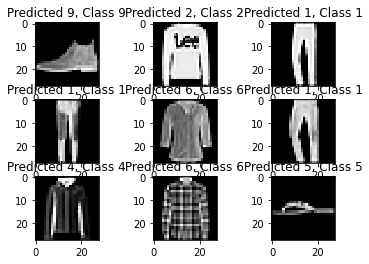

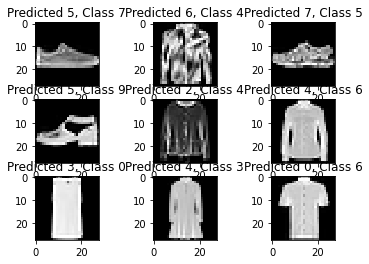

In [34]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))

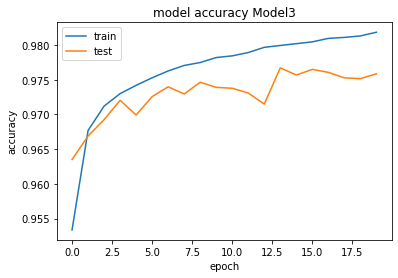

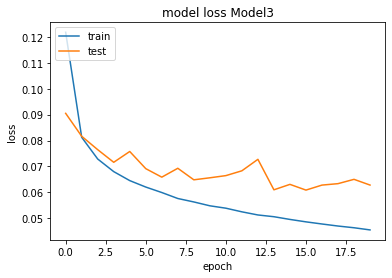

In [40]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy Model3')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss Model3')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [39]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_test, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.81      0.77      0.79      1000
     Class 1       0.97      0.95      0.96      1000
     Class 2       0.73      0.66      0.69      1000
     Class 3       0.78      0.87      0.82      1000
     Class 4       0.59      0.86      0.70      1000
     Class 5       0.95      0.89      0.92      1000
     Class 6       0.69      0.35      0.46      1000
     Class 7       0.91      0.87      0.89      1000
     Class 8       0.88      0.96      0.92      1000
     Class 9       0.87      0.96      0.92      1000

    accuracy                           0.81     10000
   macro avg       0.82      0.81      0.81     10000
weighted avg       0.82      0.81      0.81     10000

